Dominik Csatari 2023.11.16.


> **Warning**: In the later section, I couldn't plot animation in the notebook, so I've created a section, where the code creates '.gif' files. I've added a  user input section above it, so it won't just generate them in your folder.



In [1]:
#Imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve
from ipywidgets import interact
from matplotlib.animation import FuncAnimation
from IPython.display import display, clear_output
import os



Exercise 1

In [2]:
#The original f function from the exercise.
def f(x):
    return 1/(1+x**2)

In [3]:
#Li is a function for choosing the Lagrange Basis, the itself is ChatGBT inspired.
def Li(x, nodes, k):
    result = 1.0
    for i in range(len(nodes)):
        if i != k:
            result *= (x - nodes[i]) / (nodes[k] - nodes[i])
    return result

In [4]:
# This code block is a visualisation function
# to show the original function, the Lagrange polynom and the nodes,
# generated by eq_dist or Chebyshev. Inspired by ChatGBT.
def plot(x_range,poly,nodes,label='Nodes'):
    plt.plot(x_range, f(x_range), label='Original Function')
    plt.plot(x_range, poly, linestyle='dashed')
    plt.scatter(nodes, f(nodes), color='red', label=label)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Original Function and Lagrange Interpolation Polynomial')
    plt.legend()
    plt.grid(True)
    plt.show()


In [5]:
# Plots the error converge or diverge on a log scale for the give 'N's.
# Inspired by ChatGBT.

def PlotError(n,errors):
  plt.plot(n, errors, marker='o')
  plt.yscale('log')
  plt.xlabel('Degree of Lagrange Polynomial (n)')
  plt.ylabel('Max Absolute Error')
  plt.title('Convergence of Lagrange Interpolation')
  plt.grid(True)
  plt.show()

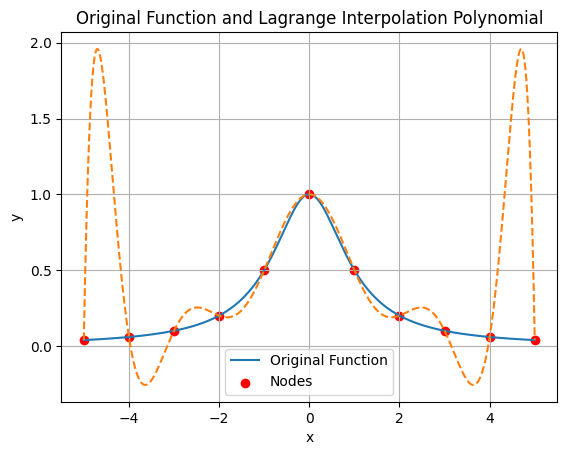

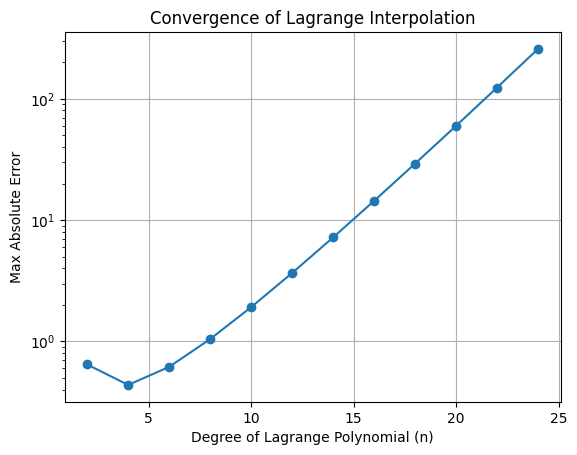

In [6]:
# n's as described in the exercise (2,4..,24)
n = np.arange(2,25,2)

# store results:
ranges = []
poly_n = []

# stores the error rate for ||f-pn||(inf)
errors = []

#iterate through n
for num in n:
    #created eq_dist points realted to the given num on the given range [-5,5]:
    eq_range=np.linspace(-5,5,num+1)

    # stores ranges for visualisation
    ranges.append(eq_range)

    #Range of accuracy
    x_range = np.linspace(-5, 5, 1000)

    # Lagrange polynoms are created in p stored in poly_n
    p = np.zeros_like(x_range)

    # Iterare through the eq_dist nodes in eq_range
    for k in range(0,len(eq_range)):
      # Follows the formula of Lagrange polynomials:
      p += f(eq_range[k])*Li(x_range,eq_range,k)

    # ||f-pn||(inf)
    max_error = np.max(np.abs(f(x_range) - p))

    errors.append(max_error)
    poly_n.append(p)



#ind is for the plot() function, to choose, at which 'N' do we want to plot the function
ind=4
plot(x_range,poly_n[ind],ranges[ind])

# This line is only needed at the last section of the code when saving to '.gif' for animation
# if desired.
plot1_x_range,plot1_poly_n,plot1_ranges = x_range,poly_n,ranges[ind]

# Plots the error converge or diverge on a log scale for the give 'N's.
PlotError(n,errors)



Exercise 1 b)

In [7]:
# Finds Chebyshev Zeros:
# Inspired by ChatGBT rewritten by me:
def C_zeros(l,N):
    k = np.arange(1, N + 1)
    return l*np.cos((2*k-1)*np.pi/(2*N))

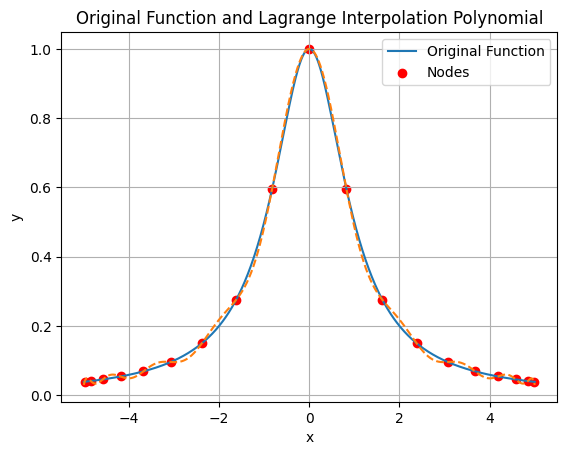

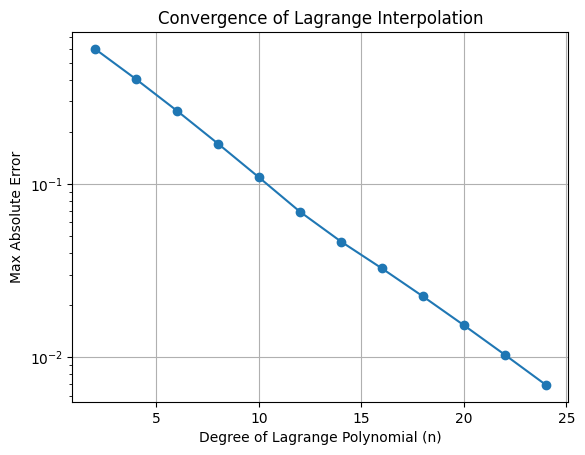

In [8]:
# n's as described in the exercise (2,4..,24)
n = np.arange(2,25,2)

#store results:
ranges = []
poly_n = []

# stores the error rate for ||f-pn||(inf)
errors = []

#iterate through 'n':
for num in n:

    #created points via finding the accurate Chebyshev zeros with c_zeros()in the range [-5,5]:
    C_range = C_zeros(5,num+1)

    # stores ranges for visualisation
    ranges.append(C_range)

    # Range of accuracy
    x_range = np.linspace(-5, 5, 1000)

    # Lagrange polynoms are created in p stored in poly_n
    p = np.zeros_like(x_range)

    # Iterare through the nodes in C_range:
    for k in range(0,len(C_range)):
      # Follows the formula of Lagrange polynomials:
      p += f(C_range[k])*Li(x_range,C_range,k)


    # ||f-pn||(inf)
    max_error = np.max(np.abs(f(x_range) - p))

    poly_n.append(p)
    errors.append(max_error)



#ind is for the plot() function, to choose, at which 'N' do we want to plot the function
ind=-4
plot(x_range,poly_n[ind],ranges[ind])

# This line is only needed at the last section of the code when saving to '.gif' for animation
# if desired.
plot2_x_range,plot2_poly_n,plot2_ranges = x_range,poly_n,ranges[ind]
# Plots the error converge or diverge on a log scale for the give 'N's.
PlotError(n,errors)


Exercise 2

In [9]:
# This function is equivalent of the f(x,t) function in lab3 description.
def g(x,t):
  return np.sin(5*np.pi*x)+np.cos(10*np.pi*t)+2*np.sin(7*np.pi*x)*np.cos(14*np.pi*t)


In [10]:
# Hard-coded derivative of g
def g_deriv(x,t):
  return np.pi*(14*np.cos(14*np.pi*t)*np.cos(7*np.pi*x)+5*np.cos(5*np.pi*x))

In [11]:
# x = [0/50,1/50,...1]
x = np.linspace(0,1,51)

# t = [0/50,1/50,...1]
t = np.linspace(0,1,51)


# Range, in which the values will be chosen and plotted [1000]
x_range = np.linspace(0,1,1000)



In [12]:
#This equation is the same as the formula given in lab 3 description of Linear interpoalton Spline
def sL(xi,xi_prev,x,t=0):
  return (xi-x)/(xi-xi_prev)*g(xi_prev,t) + (x-xi_prev)/(xi-xi_prev)*g(xi,t)

In [13]:

# This is array will have 51 arrays, for every timestamp in t.
animation_Linear = []


# Going through every timestamp
for curr_t in t:

  result_func = []


  step = 0

  for i in range(0,len(x_range)):
    if step+1 <= len(x):
      # if current x is not in this range, we increase our range
      if x_range[i] >= x[step] and x_range[i] <= x[step+1]:
        temp = sL(x[step+1],x[step],x_range[i],curr_t)

      else:
        step += 1
        temp = sL(x[step+1],x[step],x_range[i],curr_t)


    result_func.append(temp)

  animation_Linear.append(result_func)



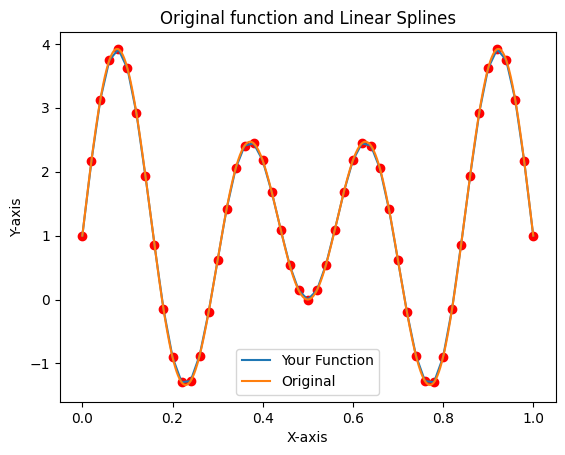

In [14]:
# Plotting the function at a fixed 't'. Animation for every t is later section below.
fixed_t = 0

plt.plot(x_range, animation_Linear[fixed_t], label='Your Function')
plt.plot(x_range, g(x_range,t[fixed_t]), label='Original')
plt.scatter(x,g(x,t[fixed_t]),color = 'red')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Original function and Linear Splines')
plt.legend()

Hermite Interpolation

In [15]:
# These coefficents are defined as the formulas in Lecture Notes 5, page 22
def H0(xi,x_prev,x):
  return ((x-xi)**2)/((xi-x_prev)**2)*(1+2/(xi-x_prev)*(x-x_prev))

def H1(xi,x_prev,x):
  return ((x-x_prev)**2)/((xi-x_prev)**2)*(1-2/(xi-x_prev)*(x-xi))

def K0(xi,x_prev,x):
  return ((x-xi)**2)/((xi-x_prev)**2)*(x-x_prev)

def K1(xi,x_prev,x):
  return ((x-x_prev)**2)/((xi-x_prev)**2)*(x-xi)



In [16]:
# This formula for the Hermite Interpolation was defined as the formula in Lecture Notes 5, page 22
def sH(x_prev,xi,x,t=0):
  return H0(xi,x_prev,x)*g(x_prev,t)+g_deriv(x_prev,t)*K0(xi,x_prev,x)+g(xi,t)*H1(xi,x_prev,x)+g_deriv(xi,t)*K1(xi,x_prev,x)


In [17]:
# This is array will have 51 arrays, for every timestamp in t.
animation_Hermite = []

for curr_t in t:

  result_func = []

  step = 0

  for i in range(0,len(x_range)):
    if step+1 <= len(x):
      # if current x is not in this range, we increase our range
      if x_range[i] >= x[step] and x_range[i] <= x[step+1]:
        temp = sH(x[step], x[step+1],x_range[i],curr_t)

      else:
        step += 1
        temp = sH(x[step], x[step+1],x_range[i],curr_t)

    result_func.append(temp)

  animation_Hermite.append(result_func)



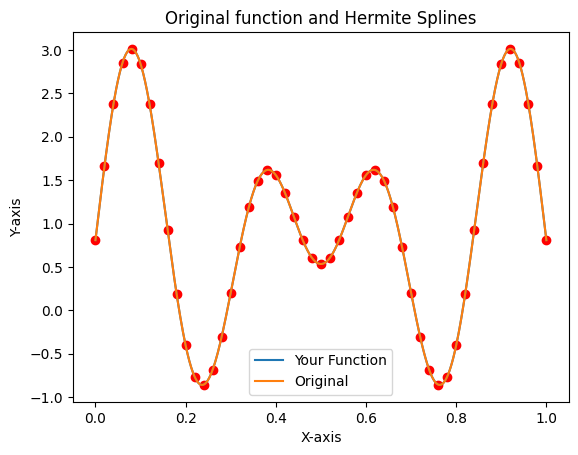

In [18]:
#This is for animating at a fixed 't' value. Animation for all t values is in a later section.
fixed_t = 1
plt.plot(x_range, animation_Hermite[fixed_t], label='Your Function')
plt.plot(x_range, g(x_range,t[fixed_t]), label='Original')
plt.scatter(x,g(x,t[fixed_t]),color = 'red')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Original function and Hermite Splines')
plt.legend()

Natural cubic Spline

1.   The implementaion will follow the Lecture 5 notes(page 20-21), the naming convention is the same for variables (except the function f(x) is g(x,t)).






In [19]:
# Right-hand side bi element of Ax=b where b0 = b_last = 0
def b(x_prev,xi,x_next,t):
  return 6*(g(x_next,t)-g(xi,t))/(x_next-xi) - 6*(g(xi,t)-g(x_prev,t))/(xi-x_prev)


In [20]:

x = np.linspace(0,1,51)

# This is the initialization of A matrix which later won't be used,
# I've generated it to gather information of the values.
# as the elements of x (0..j/50..1) are at an equal distance from each other,
# In the rows of the matrix, the same values will be generated.
# In our case it's [0.02 0.08 0.02] shifter accordingly.
A = []
for i in range(len(x)):
  if i == 0:
    row = np.zeros(len(x))
    row[0] = 1
  elif i == len(x)-1:
    row = np.zeros(len(x))
    row[-1] = 1
  else:

    hm = x[i+1]-x[i]
    hm_prev = x[i]-x[i-1]
    row = np.zeros(len(x))
    row[i-1] = hm_prev
    row[i] = 2*(hm_prev+hm)
    row[i+1] = hm

  A.append(row)






In [21]:
# This is the pseudo code from the wikipage: https://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm
# Which uses a simplified form of Gaussian elimination. I've transformed the pseudo into working
# Python coe with the help of ChatGBT.
def tri_gauss_solver(N, A, B, C, D):
    # Forward elimination
    for i in range(1, N):
        W = A[i-1] / B[i - 1]
        B[i] -= W * C[i - 1]
        D[i] -= W * D[i - 1]

    # Back substitution
    X = [0] * N
    X[N - 1] = D[N - 1] / B[N - 1]

    for i in range(N - 2, -1, -1):
        X[i] = (D[i] - C[i] * X[i + 1]) / B[i]

    return X



In [22]:
# Alpha defined accordingly to the formula written in lab3
def Alpha(xi,x_prev,sigma,t):
  return g(xi,t)/(xi-x_prev)-sigma*(xi-x_prev)/6

# Beta defined accordingly to the formula written in lab3
def Beta(xi,x_prev,sigma_prev,t):
  return g(x_prev,t)/(xi-x_prev)-sigma_prev*(xi-x_prev)/6


In [23]:
# Natural Spline defined accordingly to the formula written in lab3
def s2(xi,x_prev,x,sigma_prev,sigmai,alpha,beta):
  return ((xi-x)**3)/(6*(xi-x_prev))*sigma_prev+((x-x_prev)**3)/(6*(xi-x_prev))*sigmai+alpha*(x-x_prev)+beta*(xi-x)

In [24]:
#Initial values gather from matrix A forcalcualting Ax=b, where x in our case is array delta
N = 51
A = [0.02] * (N - 1)
C = [0.02] * (N - 1)
B = [1] + [0.08] * 49 + [1]


# for later animation
animation_Natural = []

# Going through every timestamp
for curr_t in t:
  b_arr = np.zeros(len(x))

  # Calculating right-hand side vector for current time
  for j in range(1,len(x)-1):
    b_arr[j] = b(x[j-1],x[j],x[j+1],curr_t)


  # Solution for x in Ax = b:
  x_solution = tri_gauss_solver(N,A,B,C,b_arr)


  # I start the spline formation here:

  result_func = []

  step = 0

  for i in range(0,len(x_range)):

    if step+1 <= len(x):
      #if current x is not in this range, we increase our range
      if x_range[i] >= x[step] and x_range[i] <= x[step+1]:
        # Initializing values accordingly to Lecture 5 page 20-21
        # and Lab3 page 3
        sigma_prev= x_solution[step]
        sigmai= x_solution[step+1]

        alpha = Alpha(x[step+1],x[step],sigmai,curr_t)
        beta= Beta(x[step+1],x[step],sigmai,curr_t)

        temp = s2(x[step+1], x[step],x_range[i],sigma_prev,sigmai,alpha,beta)

      else:
        step += 1

        # Initializing values accrodingly to Lecture 5 page 20-21
        # and Lab3 page 3
        sigma_prev= x_solution[step]
        sigmai= x_solution[step+1]
        alpha= Alpha(x[step+1],x[step],sigmai,curr_t)
        beta= Beta(x[step+1],x[step],sigmai,curr_t)
        temp = s2(x[step+1], x[step],x_range[i],sigma_prev,sigmai,alpha,beta)


    result_func.append(temp)

  animation_Natural.append(result_func)



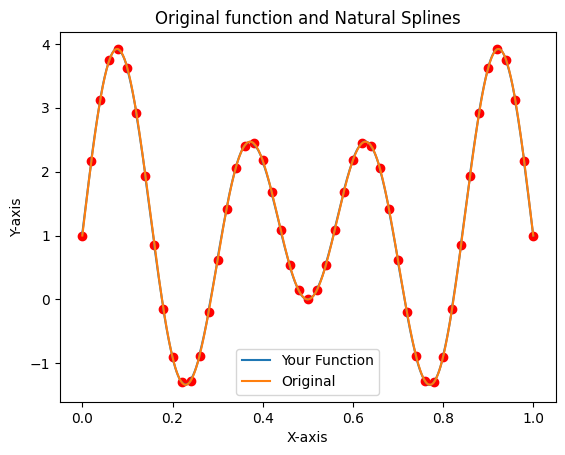

In [30]:
#This is for animating at a fixed 't' value.
fixed_t = 0

plt.plot(x_range, animation_Natural[fixed_t], label='Your Function')
plt.plot(x_range, g(x_range,t[fixed_t]), label='Original')
plt.scatter(x,g(x,t[fixed_t]),color = 'red')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Original function and Natural Splines')
plt.legend()


From Here I've created the animation.
All of them are saved in '.gif' form, as in colab I had no other way
of visualising it correctly. I put a line which ask you for user input, so the '.gif' files won't generate automatically.

In [26]:
user_input = input("Generate '.gif' files into this folder(y/n): ")

answer = str(user_input)
if answer == 'y':
  generate = True
else:
  generate = False

Generate '.gif' files into this folder(y/n): y


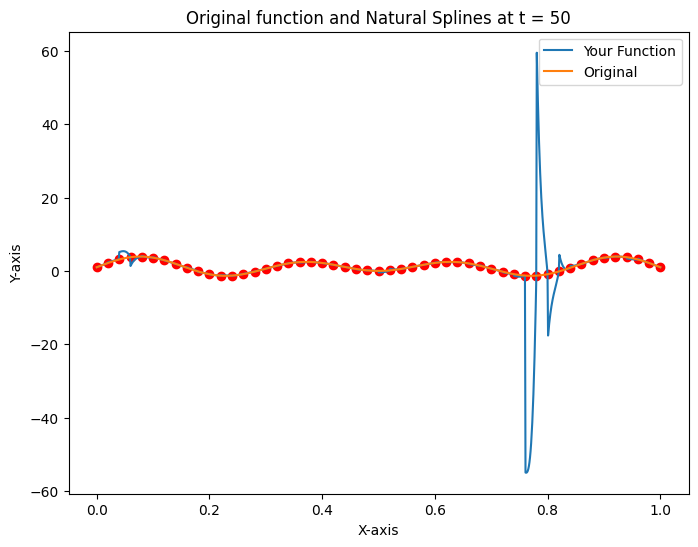

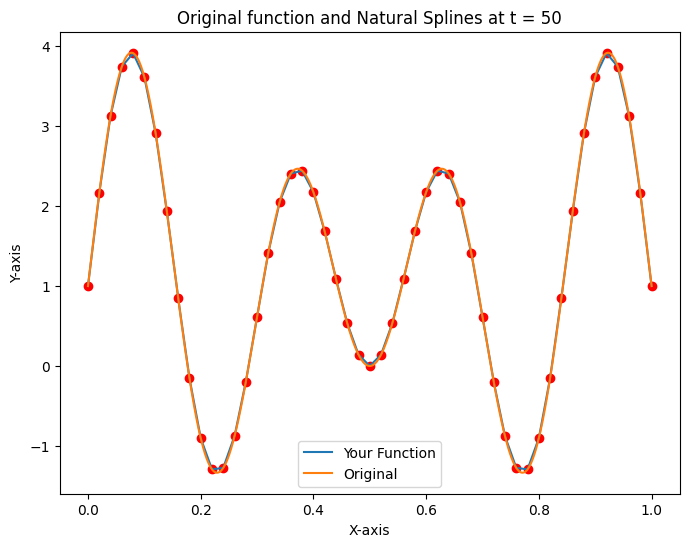

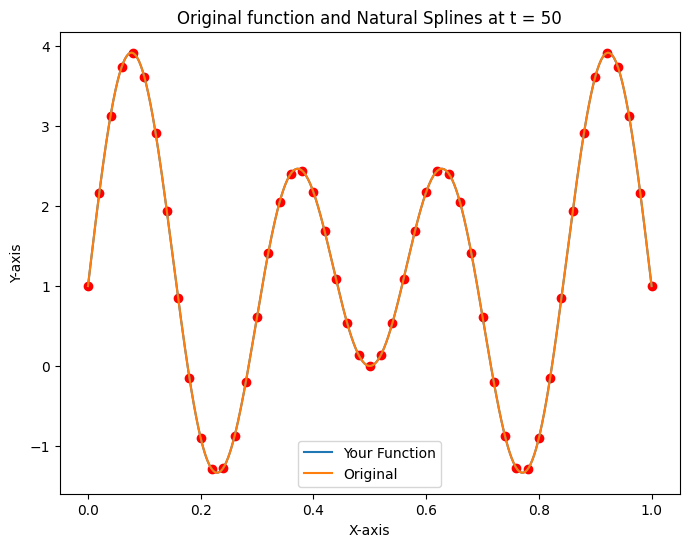

In [27]:
#ChatGBT inspired rewritten and implemented by me.
def GenerateGif(curr_arr,name):
  fig, ax = plt.subplots(figsize=(8, 6))

  def update(frame):
      ax.clear()
      ax.plot(x_range, curr_arr[frame], label='Your Function')
      ax.plot(x_range, g(x_range, t[frame]), label='Original')
      ax.scatter(x, g(x, t[frame]), color='red')
      ax.set_xlabel('X-axis')
      ax.set_ylabel('Y-axis')
      ax.set_title(f'Original function and Natural Splines at t = {frame}')
      ax.legend()

  # Use FuncAnimation to create the animation
  animation = FuncAnimation(fig, update, frames=len(t), interval=500, repeat=False)

  animation.save(name, writer='imagemagick', fps=1)  # Save the animation as a GIF

if generate:
  GenerateGif(animation_Natural, 'animation_Natural.gif')
  GenerateGif(animation_Linear, 'animation_Linear.gif')
  GenerateGif(animation_Hermite, 'animation_Hermite.gif')

Animation for Exercise 1 with '.gif' files

In [28]:
#user_input, so .gif won't generate wth first run.

user_input = input("Generate '.gif' files into this folder(y/n): ")

answer = str(user_input)
if answer == 'y':
  generate_lag = True
else:
  generate_lag = False

Generate '.gif' files into this folder(y/n): y


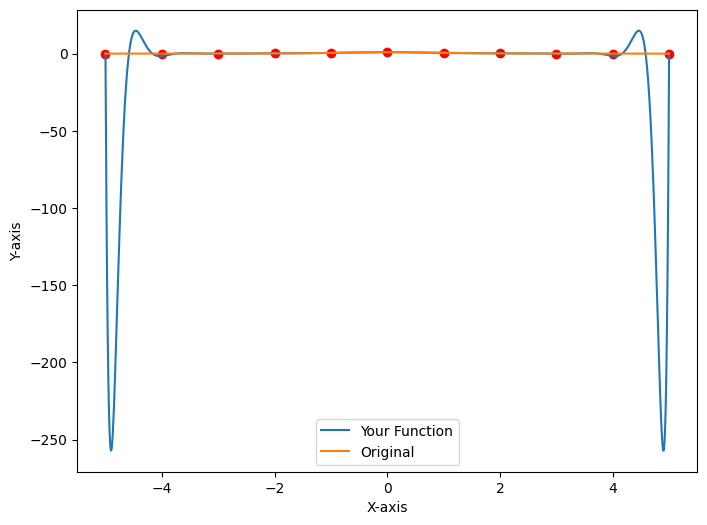

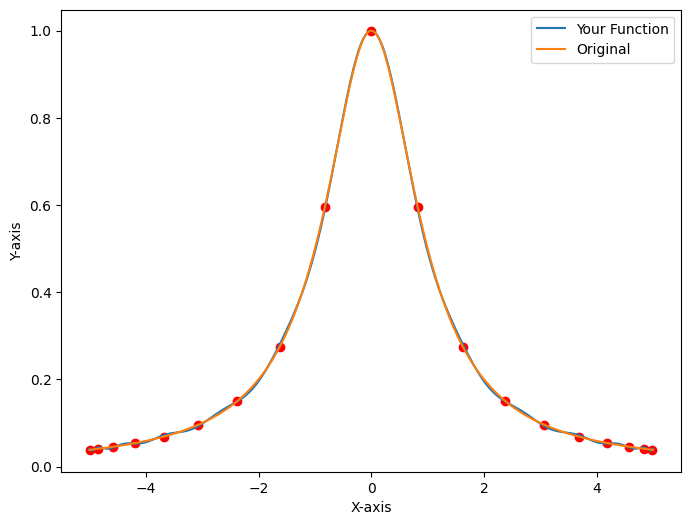

In [29]:
# This is for animating Exercise 1:

def Exercise1_animation(x_range,poly_functions,nodes,name,label='Knots'):
    fig, ax = plt.subplots(figsize=(8, 6))

    def update(frame):
        ax.clear()

        ax.plot(x_range, poly_functions[frame], label='Your Function')
        ax.plot(x_range, f(x_range), label='Original')
        ax.scatter(nodes, f(nodes), color='red')
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')
        ax.legend()


    animation = FuncAnimation(fig, update, frames=len(poly_n), interval=500, repeat=False)
    animation.save(name, writer='imagemagick', fps=1)  # Save the animation as a GIF

if generate_lag:

  Exercise1_animation(plot1_x_range,plot1_poly_n,plot1_ranges,name='Lagrange_Interpolation.gif')
  Exercise1_animation(plot2_x_range,plot2_poly_n,plot2_ranges,name='Lagrange_Interpolation_with_Chebyshev_Zeros.gif')

